<a href="https://colab.research.google.com/github/zeinebletaief/myUber/blob/master/ConvNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ConvNets in Keras

This notebook is adapted from ["Classify Fashion-MNIST with a simple CNN in Keras"](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb#scrollTo=r2NPAI4jZZgi) by Margaret Maynard-Reid.

## Install Tensorflow (keras) and Download the CIFAR10 data


In [1]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

170500096/170498071 [==============================] - 47s 0us/step
x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)


## Visualize the data

x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)
50000 train set
10000 test set


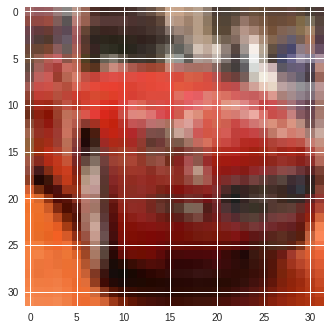

In [0]:
# Print training set shape - note there are 50,000 training data of image size of 32x32, 50,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')


# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]

# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 50000
Number of test data - 10000


## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.



In [0]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]


# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (45000, 32, 32, 3) y_train shape: (45000, 10)
45000 train set
5000 validation set
10000 test set


## Create a simple ConvNet architecture

There are two APIs for defining a model in Keras:
1. [Sequential model API](https://keras.io/models/sequential/)
2. [Functional API](https://keras.io/models/model/)

In this notebook we are using the Functional API. 
The [original notebook](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb#scrollTo=QgTZ47SsZZg4) uses Sequential API.

In [0]:
from tensorflow import keras

inputs = keras.Input(shape=(32, 32, 3)) 
x = keras.layers.Conv2D(filters=6, kernel_size=5, padding='valid', activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=16, kernel_size=5, padding='valid', activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
#flatten is to go from tensor to vector 
x = keras.layers.Dense(120, activation='relu')(x)
x = keras.layers.Dense(84, activation='relu')(x)
x = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=x)
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
__________

## Compile the model
Configure the learning process with compile() API before training the model. It receives three arguments:

*   An optimizer 
*   A loss function 
*   A list of metrics 


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the model

Now let's train the model with fit() API.

We use  the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.


In [0]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid))
         #callbacks=[checkpointer])

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 9s 192us/sample - loss: 1.7300 - acc: 0.3681 - val_loss: 1.5074 - val_acc: 0.4598
Epoch 2/10
45000/45000 [==============================] - 6s 127us/sample - loss: 1.4290 - acc: 0.4844 - val_loss: 1.3645 - val_acc: 0.5106
Epoch 3/10
45000/45000 [==============================] - 6s 127us/sample - loss: 1.3067 - acc: 0.5332 - val_loss: 1.2466 - val_acc: 0.5598
Epoch 4/10
45000/45000 [==============================] - 6s 127us/sample - loss: 1.2207 - acc: 0.5664 - val_loss: 1.2371 - val_acc: 0.5596
Epoch 5/10
45000/45000 [==============================] - 6s 127us/sample - loss: 1.1641 - acc: 0.5872 - val_loss: 1.2498 - val_acc: 0.5598
Epoch 6/10
45000/45000 [==============================] - 6s 127us/sample - loss: 1.1083 - acc: 0.6077 - val_loss: 1.2497 - val_acc: 0.5526
Epoch 7/10
45000/45000 [==============================] - 6s 127us/sample - loss: 1.0681 - acc: 0.6240 - val_lo

## Test Accuracy

In [0]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9093


## AlexNet architecture

A [variant of AlexNet](https://github.com/bearpaw/pytorch-classification/blob/master/models/cifar/alexnet.py) for CIFAR10 data.

In [0]:
from tensorflow import keras

inputs = keras.Input(shape=(32, 32, 3)) 

x = keras.layers.Conv2D(filters=96, kernel_size=11, padding='same', activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=3)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=5, padding='valid', activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
#flatten is to go from tensor to vector 
x = keras.layers.Dense(120, activation='relu')(x)
x = keras.layers.Dense(84, activation='relu')(x)
x = keras.layers.Dense(10, activation='softmax')(x)


model = keras.Model(inputs=inputs, outputs=x)
# Take a look at the model summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          23296     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 192)         307392    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 192)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 384)         663936    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 2, 256)         884992    
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid))
         #callbacks=[checkpointer])

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 16s 357us/sample - loss: 1.8262 - acc: 0.2990 - val_loss: 1.6188 - val_acc: 0.3996
Epoch 2/10
45000/45000 [==============================] - 14s 319us/sample - loss: 1.5038 - acc: 0.4498 - val_loss: 1.5847 - val_acc: 0.4340
Epoch 3/10
45000/45000 [==============================] - 14s 318us/sample - loss: 1.3980 - acc: 0.4959 - val_loss: 1.3762 - val_acc: 0.5096
Epoch 4/10
45000/45000 [==============================] - 14s 318us/sample - loss: 1.3193 - acc: 0.5266 - val_loss: 1.3601 - val_acc: 0.5246
Epoch 5/10
45000/45000 [==============================] - 14s 319us/sample - loss: 1.2311 - acc: 0.5579 - val_loss: 1.2975 - val_acc: 0.5444
Epoch 6/10
45000/45000 [==============================] - 14s 320us/sample - loss: 1.1571 - acc: 0.5852 - val_loss: 1.2929 - val_acc: 0.5534
Epoch 7/10
45000/45000 [==============================] - 14s 319us/sample - loss: 1.0874 - acc: 0.6118 -

# VGG architecture

[The sequential API version](https://github.com/geifmany/cifar-vgg/blob/master/cifar10vgg.py)

[Keras official implementation](https://github.com/keras-team/keras-applications/blob/master/keras_applications/vgg16.py)

In [0]:
def ConvBlock(nb_kernels, drop_rate, pooling, x):
    x=keras.layers.Conv2D(nb_kernels, 3, padding='same', activation='relu')(x)    
    if drop_rate > 0:
        x=keras.layers.Dropout(drop_rate)(x)
    if pooling:
        x=keras.layers.MaxPooling2D(pool_size=2)(x)
    return x


x = ConvBlock(64, 0.3, False, x)
x = ConvBlock(64, 0, True, x)
x = ConvBlock(128, 0.4, False, x)
x = ConvBlock(128, 0, True, x)
x = ConvBlock(256, 0.4, False, x)
x = ConvBlock(256, 0.4, False, x)
x = ConvBlock(256, 0, True, x)
x = ConvBlock(512, 0.4, False, x)
x = ConvBlock(512, 0.4, False, x)
x = ConvBlock(512, 0, True, x)
x = ConvBlock(512, 0.4, False, x)
x = ConvBlock(512, 0.4, False, x)
x = ConvBlock(512, 0, True, x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=x)
# Take a look at the model summary
model.summary()

# InceptionNet

[Keras implementation](https://github.com/keras-team/keras-applications/blob/master/keras_applications/inception_v3.py)

In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
import numpy as np

base_model = InceptionV3(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('mixed4').output)

img_path = '10155.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print(features.shape)

(1, 17, 17, 768)


# ResNet


[Keras implementation](https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py)

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '10155.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 5us/step
Predicted: [('n07684084', 'French_loaf', 0.7745692), ('n04111531', 'rotisserie', 0.033444814), ('n07579787', 'plate', 0.025652913)]


In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

XceptionNet

